In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle

In [1]:
!pip install streamlit


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Load Dataset

titanic = pd.read_csv('C:\\Users\\ASUS\\Desktop\\New Project\\data\\Titanic-Dataset.csv')

In [8]:
# Dataset Overview

print('Dataset Shape:', titanic.shape)

Dataset Shape: (891, 12)


In [ ]:
# Print Columns

print('Columns:', titanic.columns.tolist())

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
# Print Data Types and First 5 Row in the Dataset

print('Data Types:\n', titanic.dtypes)
titanic.head()

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Preprocessing

In [13]:
# Handle missing values

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Encode categorical variables

titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [23]:
titanic[['Sex', 'Embarked']].head()

,Sex,Embarked
0,0,0
1,1,1
2,1,0
3,1,0
4,0,0


In [24]:
# Select features

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic[features]
y = titanic['Survived']

In [25]:
# Split Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (712, 7)
Test set shape: (179, 7)


Visualize Key Patterns

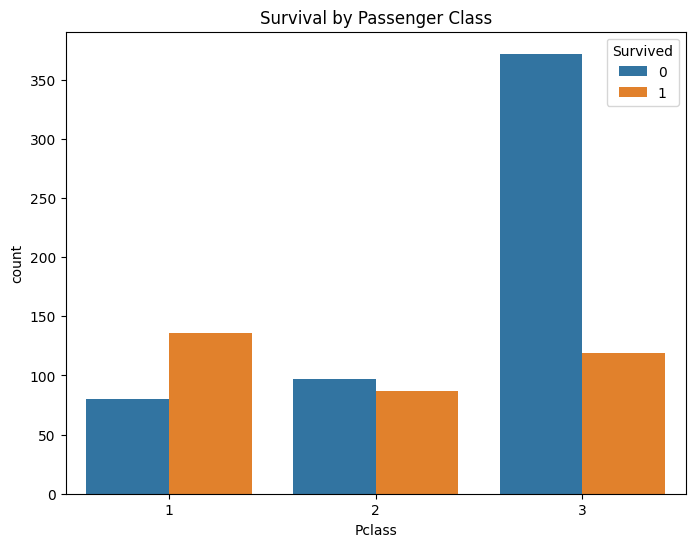

In [ ]:
# Survival by Passenger Class
# Previously Encode categorical variable (male=0, female=1)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.show()

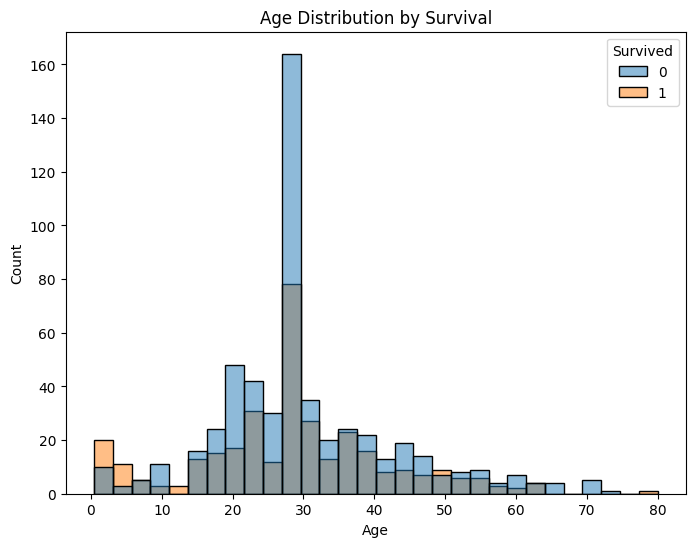

In [ ]:
# Age Distribution by Survival
# Previously Encode categorical variable (male=0, female=1)

plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30)
plt.title('Age Distribution by Survival')
plt.show()

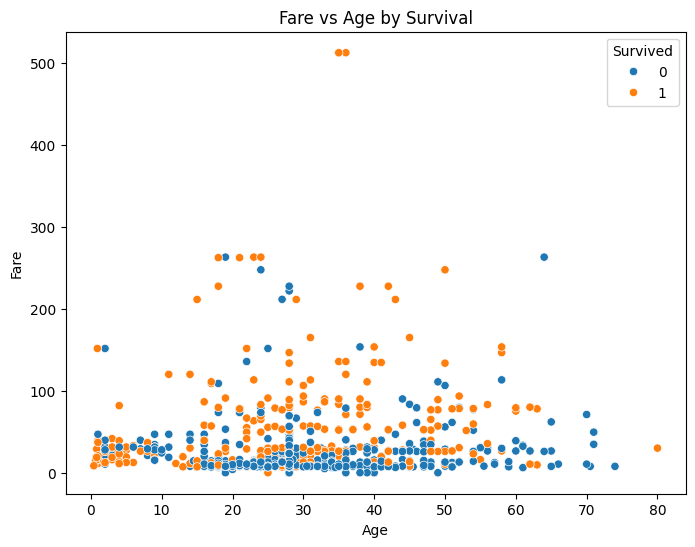

In [ ]:
# Fare vs Age
# Previously Encode categorical variable (male=0, female=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic)
plt.title('Fare vs Age by Survival')
plt.show()

Model Training

In [33]:
#Initialize models

rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train models

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Evaluate models

models = {'Random Forest': rf, 'Logistic Regression': lr}
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    y_pred = model.predict(X_test)
    results[name] = {
        'CV Accuracy': cv_scores.mean(),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Display results

results_titanic = pd.DataFrame(results).T
print(results_titanic)

                     CV Accuracy  Test Accuracy  Precision    Recall  F1 Score
Random Forest           0.811468       0.826816   0.811594  0.756757  0.783217
Logistic Regression     0.793491       0.798883   0.771429  0.729730  0.750000


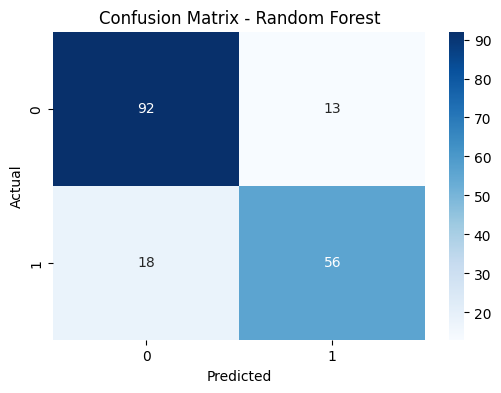

In [34]:
# Confusion Matrix for Random Forest

cm = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Save Best Model

In [35]:
with open('../model.pkl', 'wb') as f:
    pickle.dump(rf, f)
print('Model saved as model.pkl')

Model saved as model.pkl
